In [3]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#LOAD THE DATASET
df=pd.read_csv(r'C:\Users\HP\Desktop\phishing website\phishing_site_urls.csv')

In [5]:
#INSPECT THE DATASET
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [6]:
df.shape

(549346, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [8]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [9]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [10]:
#TOKENIZING
from nltk.tokenize import RegexpTokenizer

In [11]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [12]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [13]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [14]:
df['text_tokenized']= df.URL.map(lambda t: tokenizer.tokenize(t))

In [15]:
df.head

<bound method NDFrame.head of                                                       URL Label  \
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad   
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad   
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad   
3       mail.printakid.com/www.online.americanexpress....   bad   
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad   
...                                                   ...   ...   
549341                                    23.227.196.215/   bad   
549342                                 apple-checker.org/   bad   
549343                                  apple-iclods.org/   bad   
549344                                 apple-uptoday.org/   bad   
549345                                  apple-search.info   bad   

                                           text_tokenized  
0       [nobell, it, ffb, d, dca, cce, f, login, SkyPe...  
1       [www, dghjdgf, com, paypal, co, uk, c

In [16]:
from nltk.stem.snowball import SnowballStemmer

In [17]:
stemmer = SnowballStemmer('english')

In [18]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [19]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [20]:
df['text'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [21]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [22]:
good_sites = df[df.Label == 'good']
bad_sites = df[df.Label == 'bad']

In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [24]:
def plot_wordcloud( text, mask=None, max_words=400, max_front_size=120, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)
    
    wordcloud = WordCloud(background_color='white',
                          stopwords = stopwords,
                          max_words = max_words,
                          max_font_size = max_front_size,
                          random_state = 42,
                          mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation= "bilinear");
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
        
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                   'verticalalignment': 'bottom'})
        
        plt.axis('off')
        plt.tight_layout()

In [25]:
all_text = ' '.join(good_sites['text'].tolist())

In [26]:
from wordcloud import WordCloud

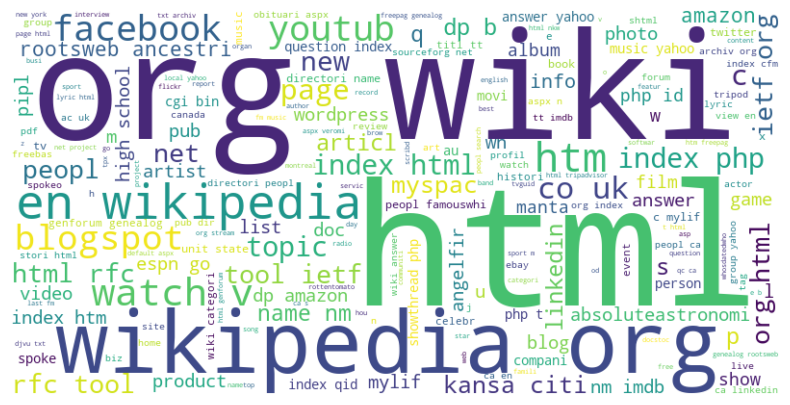

In [27]:
#generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#display the word cloud
plt.figure(figsize=(10 , 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
all_text = ' '.join(bad_sites['text'].tolist())

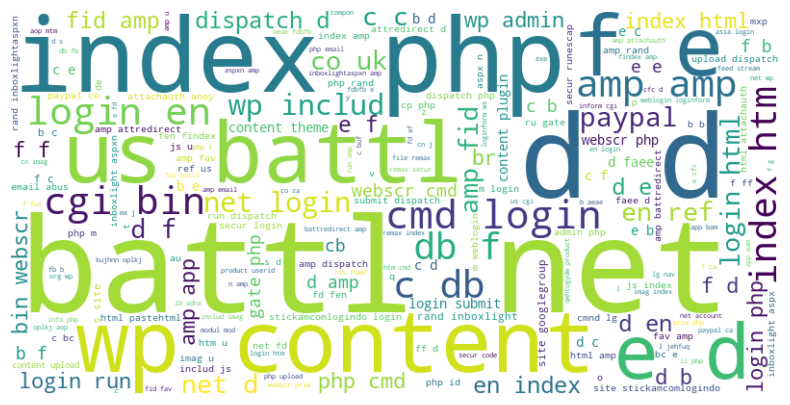

In [29]:
#generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#display the word cloud
plt.figure(figsize=(10 , 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [31]:
#convert to vector
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()

In [33]:
features= cv.fit_transform(df.text)

In [34]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 350837))

In [35]:
#splitting data into testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, df.Label)

### MODEL TRAINING

### Logistic Regression

In [36]:
#MODEL TRAINING
#logistic regression
from sklearn.linear_model import LogisticRegression

In [37]:
l_model = LogisticRegression()

In [38]:
l_model.fit(x_train, y_train)

c:\Users\HP\Desktop\phishing website\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
l_model.score(x_test, y_test)

0.9627340046746324

In [40]:
l_model.score(x_train, y_train)
#testing and training data accuracy is almost similar hence the model does not overfits; if the training data 
#accuracy would be more and testing data accuracy would be near 90 so we could have said that the model overfits.

0.9770199194677787

In [41]:
from sklearn.metrics import classification_report
print ('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test),y_test,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.97      0.93     36607
        Good       0.99      0.96      0.97    100730

    accuracy                           0.96    137337
   macro avg       0.94      0.96      0.95    137337
weighted avg       0.96      0.96      0.96    137337



In [42]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
                       columns = ['Predicted:Bad', 'Predicted:Good'],
                       index = ['Actual:Bad', 'Actual:Good'])


CONFUSION MATRIX


<Axes: >

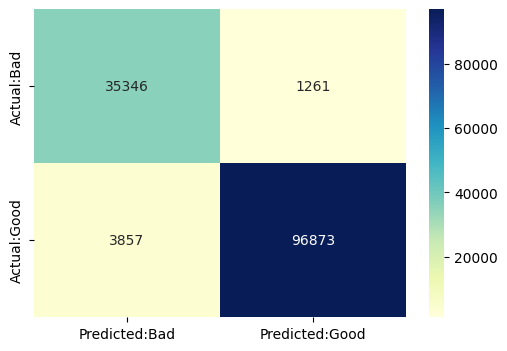

In [43]:
#HEATMAP OF CONFUSION MATRIX (logistic regression)
print('\nCONFUSION MATRIX')
plt.figure(figsize = (6,4))
sns.heatmap(con_mat, annot = True, fmt = 'd', cmap ="YlGnBu")

### Naive Bayes

In [44]:
#NAIVE BAYES (takes lesser time)
from sklearn.naive_bayes import MultinomialNB 
mnb = MultinomialNB()

#training this model
mnb.fit(x_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [45]:
mnb.score(x_test, y_test)

0.9593627354609464

In [46]:
mnb.score(x_train, y_train)

0.9740345477890046

In [47]:
from sklearn.metrics import classification_report
print ('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(x_test),y_test,
                            target_names =['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     38268
        Good       0.98      0.97      0.97     99069

    accuracy                           0.96    137337
   macro avg       0.95      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337



In [48]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(x_test), y_test),
                       columns = ['Predicted:Bad', 'Predicted:Good'],
                       index = ['Actual:Bad', 'Actual:Good'])


CONFUSION MATRIX


<Axes: >

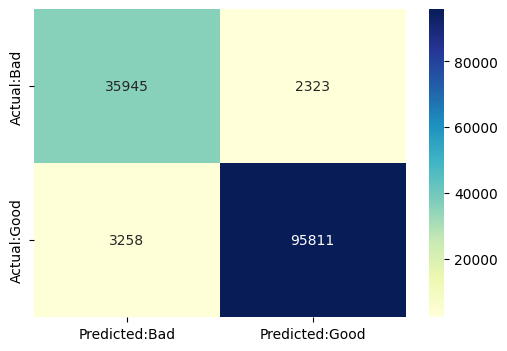

In [49]:
#HEATMAP OF CONFUSION MATRIX (naive bayes)
print('\nCONFUSION MATRIX')
plt.figure(figsize = (6,4))
sns.heatmap(con_mat, annot = True, fmt = 'd', cmap ="YlGnBu")

### SAVE MODEL

In [50]:
import pickle
pickle.dump(l_model, open('phishing.pkl', 'wb'))

In [51]:
pickle.dump(mnb, open('phishing_mnb.pkl', 'wb'))

In [52]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))